# Intro to machine learning: classification

**Before this notebook, you should look at [Intro_to_pandas.ipynb](Intro_to_pandas.ipynb).**

In this notebook, we'll explore the Scikit Learn package for simple machine learning tasks using geoscience data examples. After this day, students will have a good overview of how to look at large datasets and solve problems with state-of-the-art machine learning tools.

- Machine learning concepts
- What is it that you’re trying to solve? How can machine learning help?
- What's the difference between supervised and unsupervised methods?
- What's the difference between classification and regression?


### The machine learning iterative loop
- Data — Getting the data. How to load it and put it in an `array` and/or `DataFrame`
- Processing — data exploration, inspection, cleaning, and feature engineering.
- Model – What is a model? Training a Scikit-Learn model.
- Results – assessing quality and performance metrics (accuracy, recall, F1, confusion matrices)
- Repeat – What can we do to improve performance?

<img src="./images/ML_loop.png"></img>

## The lithology prediction task

<img src="./images/machine_learning_primer.png"></img>

# Import libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Load the data

In [2]:
import pandas as pd
df = pd.read_csv('./data/training_DataFrame_processed.csv')

---
# Scikit-learn classifiers

Let's create a model that classifies between those three classes.

## Set up the task

In [3]:
df.head()

,Unnamed: 0,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,ILD,RHOB,s_Facies
0,2828,3,A1 SH,CHURCHMAN BIBLE,2917.5,63.500,0.705,4.916,12.174,3.162,1,1.00,5.069907,2308.601274,f_siltstone
1,2829,3,A1 SH,CHURCHMAN BIBLE,2918.0,80.875,0.709,7.514,13.286,2.932,1,0.95,5.116818,2299.922224,f_siltstone
2,2830,3,A1 SH,CHURCHMAN BIBLE,2918.5,87.813,0.700,7.785,13.212,2.953,1,0.90,5.011872,2305.648726,f_siltstone
3,2831,3,A1 SH,CHURCHMAN BIBLE,2919.0,86.750,0.685,7.547,13.547,3.420,1,0.85,4.841724,2290.981429,f_siltstone
4,2832,3,A1 SH,CHURCHMAN BIBLE,2919.5,79.438,0.669,5.912,12.252,3.324,1,0.80,4.666594,2317.826888,f_siltstone


In [4]:
# Make X and y
X = df[['GR','RHOB','PE','ILD_log10']].values
y = df['s_Facies'].values

Some methods expect the data to be normalized. It's likely a good idea to normalize it no matter which method you try.

`scikit-learn` has lots of scalers. The `StandardScaler` removes the mean and scales the data to unit variance.

Let's take a quick look at the data before scaling:

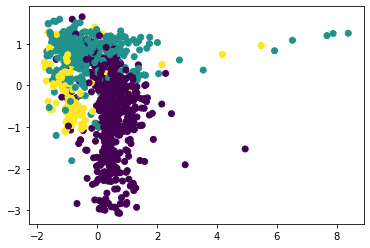

In [8]:
plt.scatter(X[:,0], X[:,1], c=df['Facies'].values)

We fit a scaler to the data, then transform the data, with a pattern that will become very familiar:

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

X = scaler.transform(X)

Note that it is possible to fit and transform some models in one step:

    X = scaler.fit_transform(X)
    
You could even instantiate the model instance in the same statement, but this has the major disadvantage of not getting access to the model later.

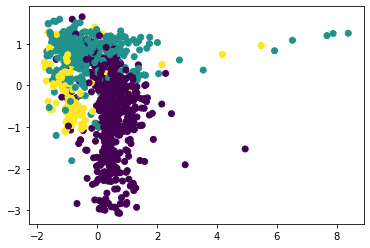

In [10]:
plt.scatter(X[:,0], X[:,1], c=df['Facies'].values)

## Split the data

We must split the data into a training set, a validation set, and a test set. **This is a key step in the process.**

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.4, random_state=42)

We will also split this second set (with the underscores) into two parts: one to **validate** against while training the model and selecting hyperparameters (sometimes also called the **dev** set), and one to assess the likely real-world performance of the trained model.

Note that you should only predict on the **test** set once, at the end of model selection and tuning.

In [12]:
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size=0.5, random_state=42)

How do we feel about this? We've drawn all our records randomly from our data.

### The IID assumption

Our data records are not strictly independent and identically distributed. So splitting like this is not a great idea for these data. We should split by well instead.

In [13]:
df['Well Name'].unique()

array(['CHURCHMAN BIBLE', 'CROSS H CATTLE', 'LUKE G U', 'NEWBY', 'NOLAN',
       'Recruit F9', 'SHANKLE', 'SHRIMPLIN'], dtype=object)

In [45]:
train_wells = ['CHURCHMAN BIBLE', 'CROSS H CATTLE', 'LUKE G U', 'NOLAN', 'SHANKLIN', 'Recruit F9']
features = ['GR','RHOB','PE','ILD_log10']

X_train = df.loc[df['Well Name'].isin(train_wells), features].values
y_train = df.loc[df['Well Name'].isin(train_wells), 's_Facies'].values

In [46]:
X_train.shape, y_train.shape

((607, 4), (607,))

In [16]:
val_wells = ['NEWBY', 'SHRIMPLIN']

X_ = df.loc[df['Well Name'].isin(val_wells), features].values
y_ = df.loc[df['Well Name'].isin(val_wells), 's_Facies'].values

In [17]:
X_.shape, y_.shape

((404, 4), (404,))

In [18]:
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size=0.5, random_state=42)

## A simple model: _k_-NN

A fairly common method for classifying data is the _k-nearest neighbours algorithm_. The label of the object in question is determined by the neighbouring data points in the feature space used. Its most important parameter, _k_ , called `n_neighbors`, is the number of neighbors you include to make a membership decision.

First we import, then instantiate, the classifier:

In [19]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()

### `fit` (train)

The next block is all you need to train a classifier model!

In [20]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### `predict`

In [22]:
y_pred=clf.predict(X_test)

{'bafflestone', 'f_siltstone', 'wackestone'}

In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(list(set(y_train)))
print(le.classes_)
print(le.transform(le.classes_))

y_val_int = le.transform(y_val) 
y_pred_int = le.transform(y_pred)

['bafflestone' 'f_siltstone' 'wackestone']
[0 1 2]


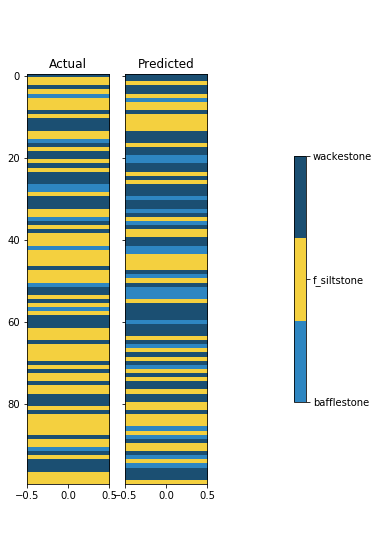

In [30]:
from matplotlib.colors import ListedColormap

fig, axs = plt.subplots(ncols=3, figsize=(5, 10), sharey=True)

colours = ['#2E86C1','#F4D03F', '#1B4F72']
cmap_facies = ListedColormap(colours, 'indexed')

ax = axs[0]
im = ax.imshow(y_val_int[:100].reshape(-1, 1), aspect=0.05, cmap=cmap_facies)
ax.set_title('Actual')

ax = axs[1]
im = ax.imshow(y_pred_int[:100].reshape(-1, 1), aspect=0.05, cmap=cmap_facies)
ax.set_title('Predicted')

ax = axs[2]
ax.axis('off')
cbar = plt.colorbar(im, ax=ax)
cbar.set_ticks([0, 1, 2])
cbar.set_ticklabels(le.classes_)

plt.show()

### `score`

Looking at the results is great, but we need to get quantitative if we want to make sure that the model we trained is _good_ and produces reasonable results. The most basic test is to look at how many good predictions we would make if we predict on our **validation** data.

In [31]:
score = clf.score(X_val, y_val)
print(f"The accuracy is {score*100:.1f}%")

The accuracy is 81.7%


This is the same as explicitly calling `sklearn.metrics.accuracy_score()` on the validation labels and the prediction from the validation data.

In [32]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_val, y_pred))

0.41089108910891087


The _accuracy_ is just one of the _metrics_ we can use to check the quality of the predictions. There are a large number of different metrics and depending on your data and problem you may need to find the one that adjusts better to your needs.

In general, _accuracy_ can be misleading, especially in datasets with unbalanced classes. A more robust metric is the `F1` metric. It combines the `precision` score and `recall`:

$$ \mathrm{F1} = \frac{2}{\frac{1}{\mathrm{precision}}+ \frac{1}{\mathrm{recall}}} $$

Scikit-learn gives a nice summary of these three metrics using `classification_report`.

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_val, clf.predict(X_val), digits=3))

precision    recall  f1-score   support

 bafflestone      0.542     0.619     0.578        21
 f_siltstone      0.917     0.838     0.876       105
  wackestone      0.780     0.842     0.810        76

    accuracy                          0.817       202
   macro avg      0.746     0.766     0.755       202
weighted avg      0.826     0.817     0.820       202



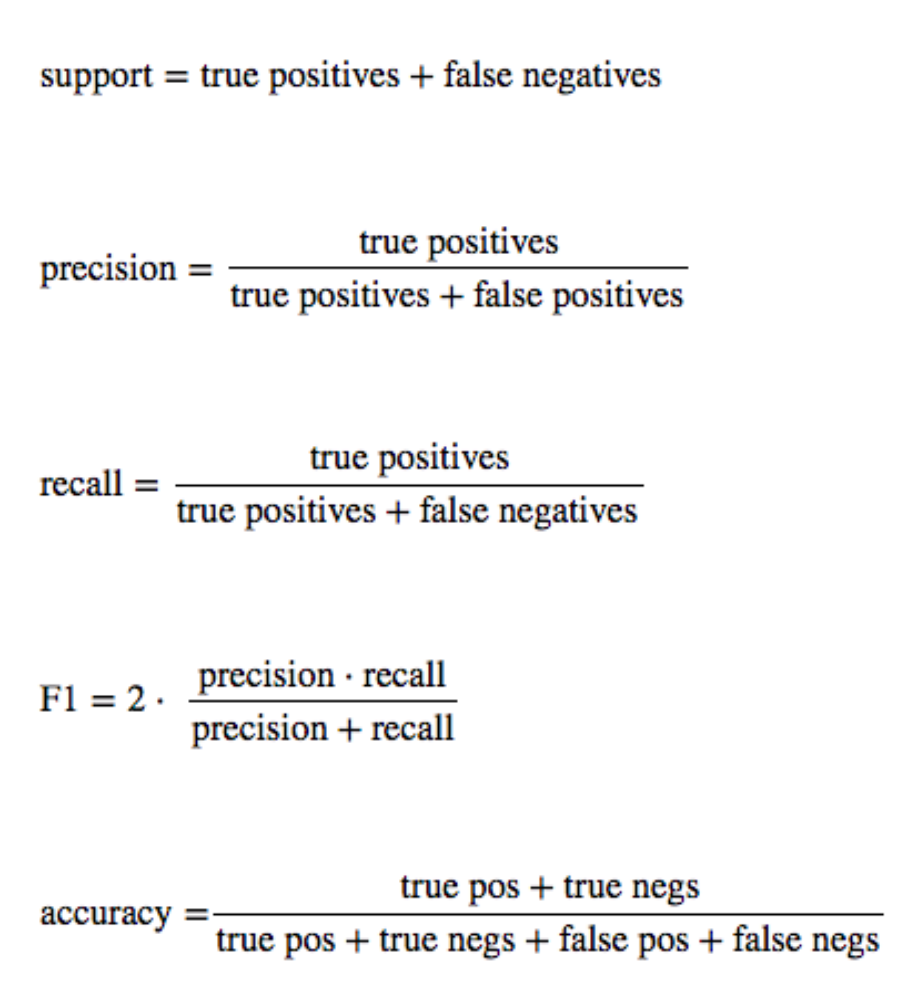

In [35]:
from IPython.display import Image
Image('./images/classification_metric_definitions.png', width=400) 

<div class="alert alert-success">
<h3>Exercise</h3>

- what is the **accuracy** of this classifier?
- what is the **precision** for dolomite and sand? 
- what is the **recall** for dolomite and sand? 
- what is the **F1 score** for dolomite and sand? 
- Discuss with a partner the situations where accuracy or F1 score can be misleading.

Note that there are 31 dolomite points and 55 sandstone points in the validation data.
</div>

In [36]:
Image('./images/2d_2class_classifier.png') 

FileNotFoundError: No such file or directory: './images/2d_2class_classifier.png'

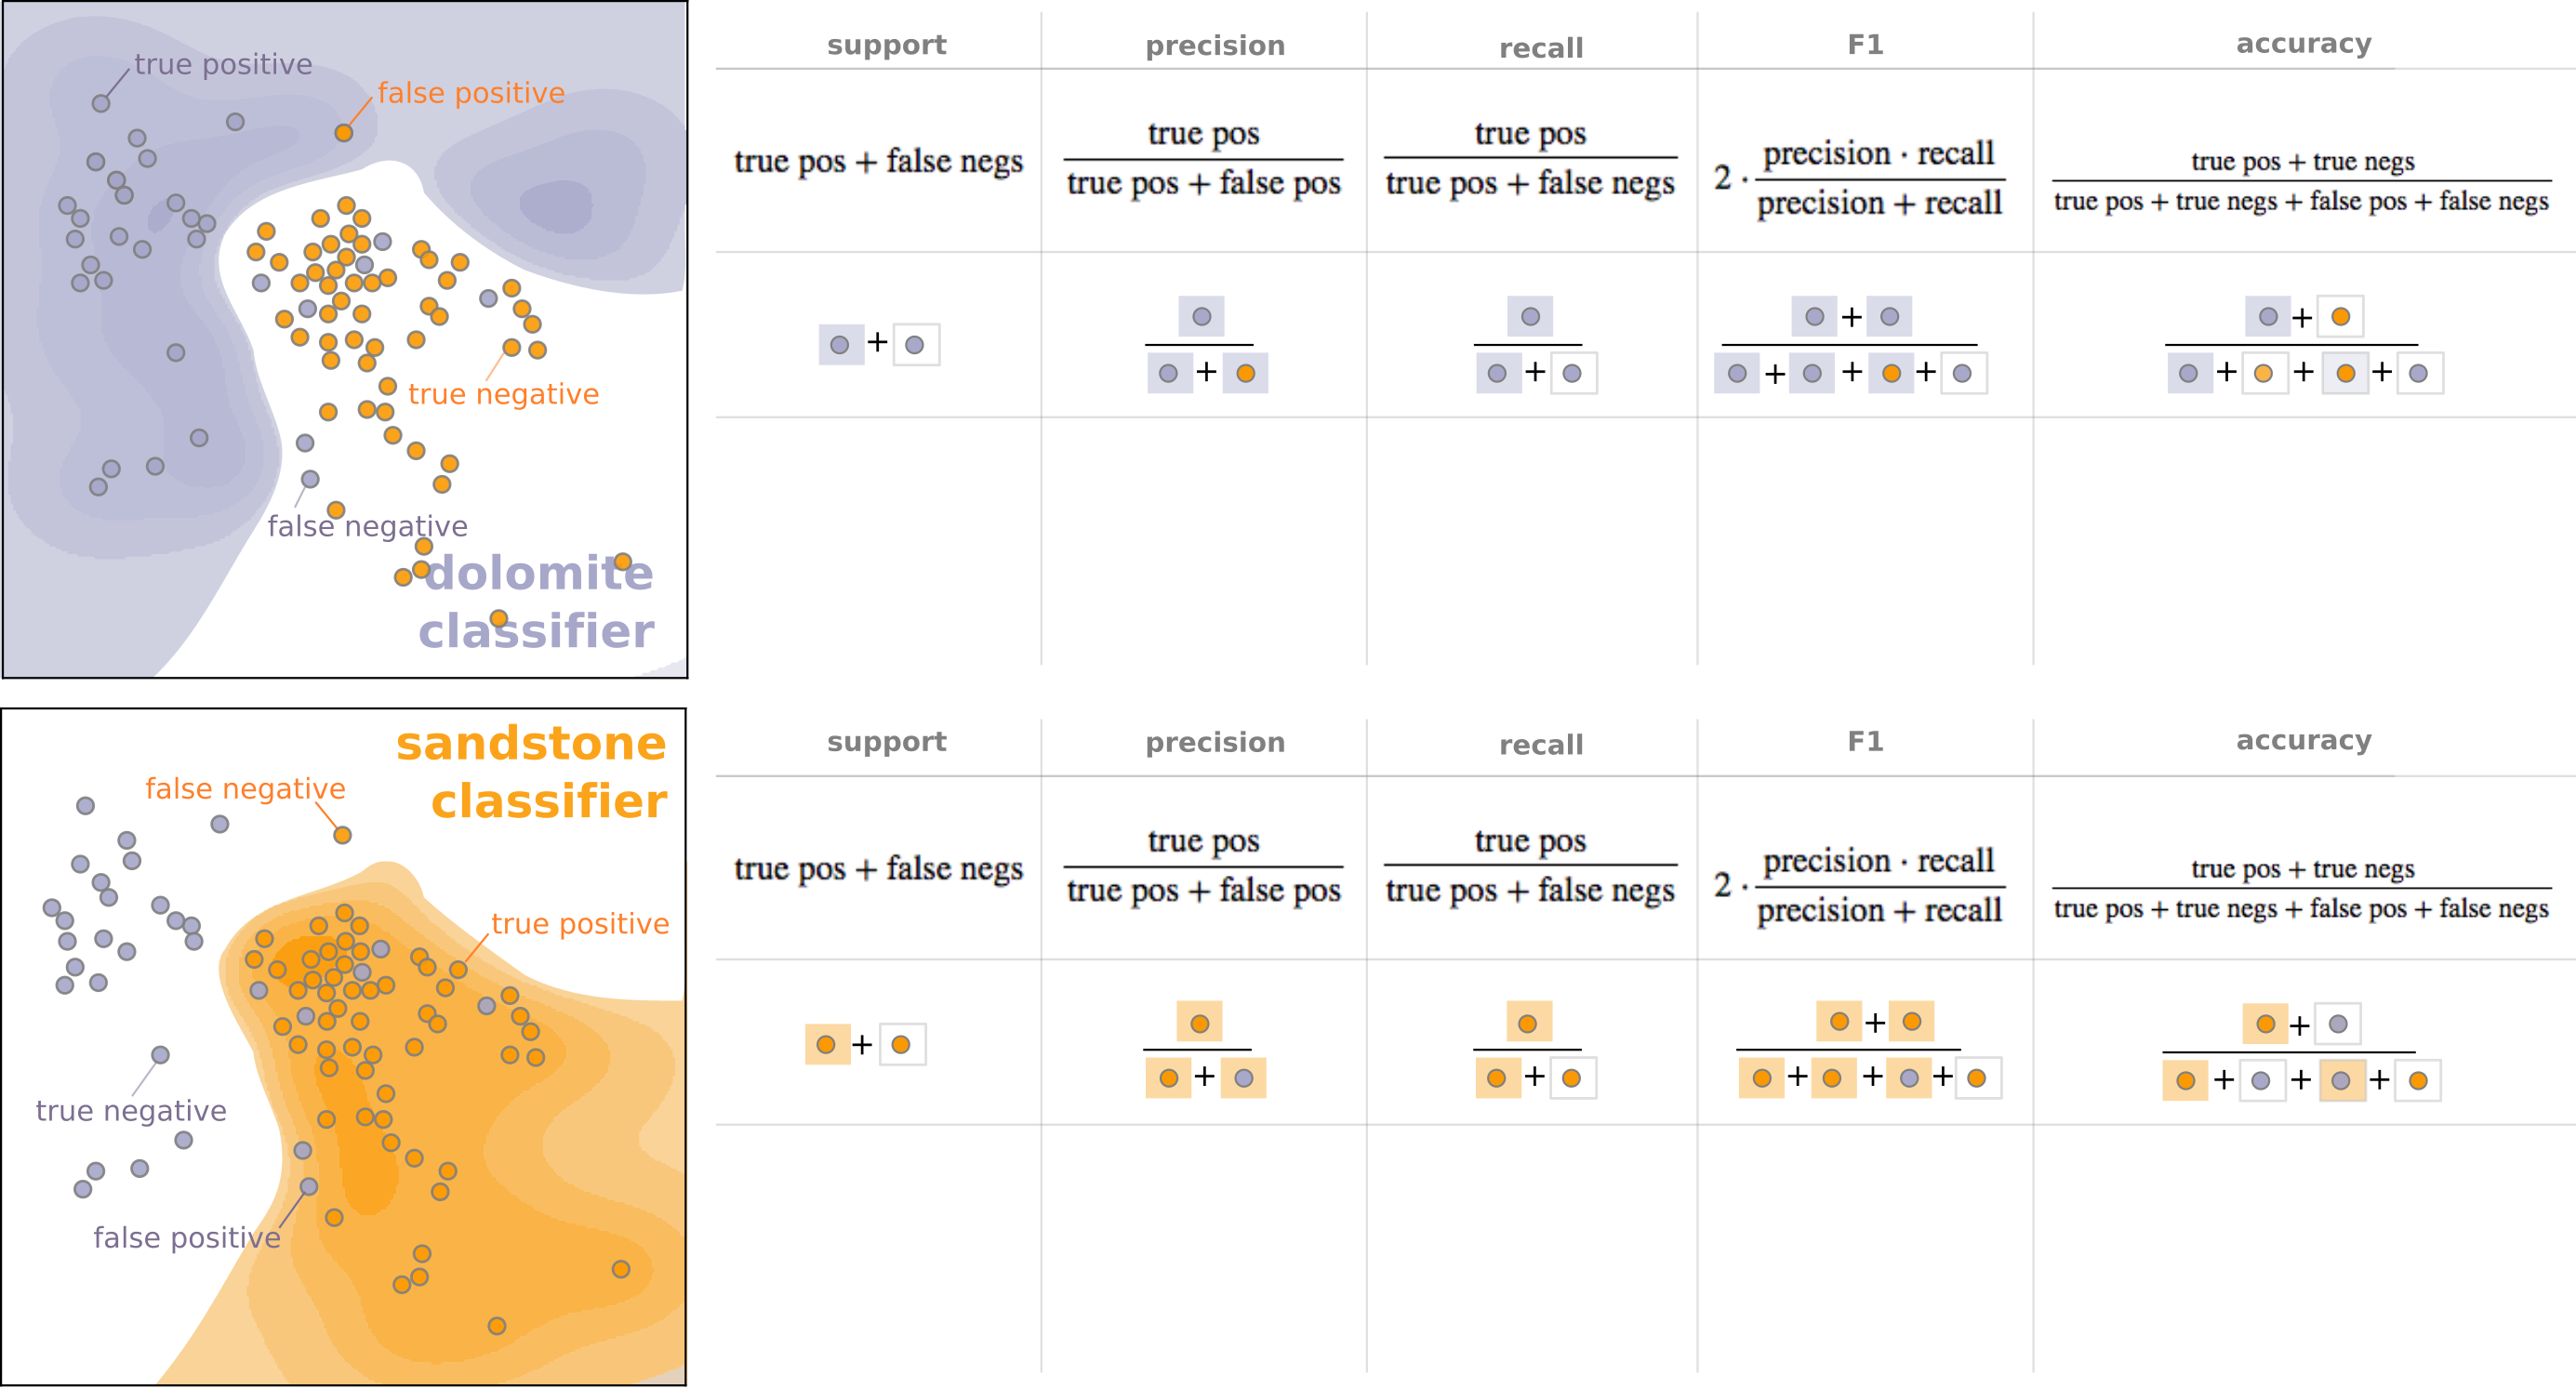

In [37]:
Image('./images/dolomite_and_sandstone_worksheet.png') 

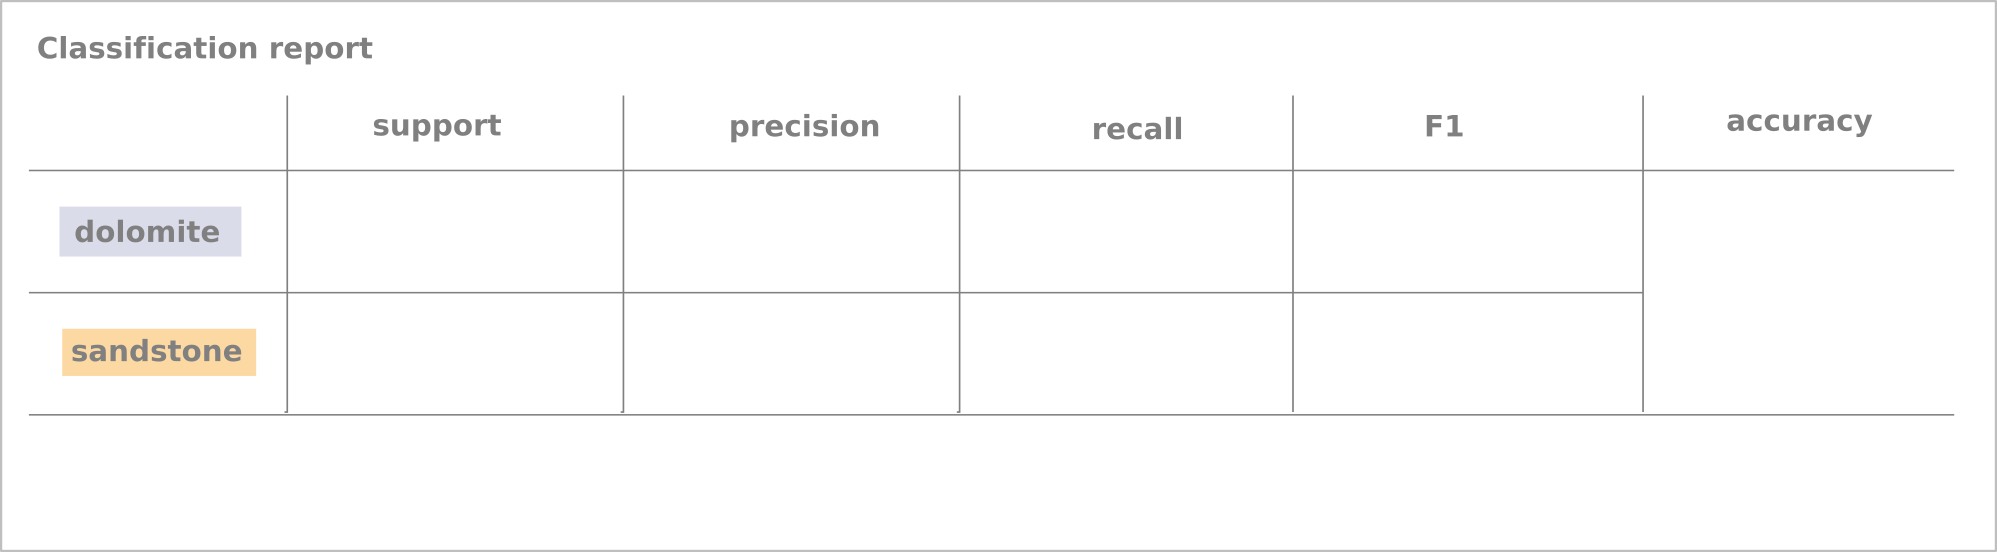

In [38]:
from IPython.display import Image
Image('./images/clf_report.png') 

## Subtlety in the score

Let's look at two types of error. 

Both of these are errors in the eyes of the ML algorithm, but not necessarily in the eyes of the geologist.

First: predicting 8 (maybe coarse sand) instead of 7 (fine sand) should not be as bad as predicting 2 (say, basalt) instead of 7. How could we fix this?

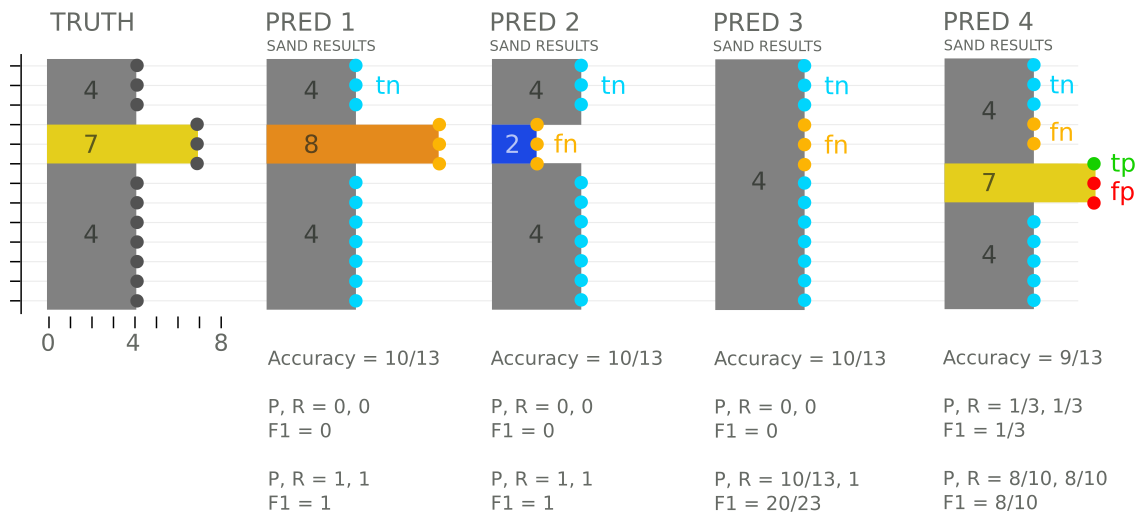

In [39]:
from IPython.display import Image
Image("./images/classification_errors.png")

## The baseline: a dummy classifier

The dummy classifier tries to answer the question, "How well can I do with zero intelligence?". In other words, given the relative proportions of facies, what would you expect from random weighted guesses?

In [40]:
from sklearn.dummy import DummyClassifier

clf = DummyClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)

print(classification_report(y_val, y_pred))

precision    recall  f1-score   support

 bafflestone       0.11      0.19      0.14        21
 f_siltstone       0.57      0.55      0.56       105
  wackestone       0.41      0.36      0.38        76

    accuracy                           0.44       202
   macro avg       0.37      0.37      0.36       202
weighted avg       0.46      0.44      0.45       202



In essence, if I can't beat this, then my model is definitely not useful.

Another measure of 'useful' is whether the classifier can beat a human (but don't forget that these labels were generated by a human!).

## Improving the performance

Depending on you requirements, this results might be good enough to deploy this model and use it on a "Machine Learning Pipeline" product but it is often not the best model you can get. Each method has a set of parameters (also known as _hyperparameters_) that can be tweaked to tune the training.

For the `KNeighborsClassifier` there are a few of these parameters:

In [47]:
KNeighborsClassifier()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

For this particular method, the most important parameter to adjust is `n_neighbors` (it's the `k` in the `KNeighborsClassifier`!). Unfortunately, there's no rule that tells you what's the optimal value of `k`. To overcome this we can train many models with different values of `k` and compare the results of classifications applied to the _Validation_ data.

In [48]:
k = np.arange(1, 60, 2) # Generated array of values of k to try

Loop over each value in `nns` and store the `F1 Score`

In [49]:
from sklearn.metrics import f1_score

vals, trns = [], []

for ki in k:
    clf = KNeighborsClassifier(n_neighbors=ki)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_val)
    vals.append(f1_score(y_val, y_pred, average='weighted'))
    y_ptrn = clf.predict(X_train)
    trns.append(f1_score(y_train, y_ptrn, average='weighted'))


What value of `k` gives us the best result?

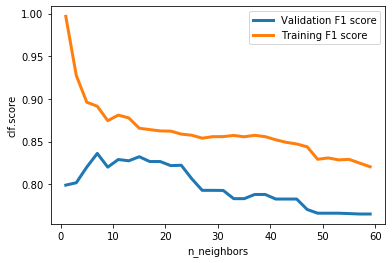

In [44]:
plt.plot(k, vals, lw=3.0, label="Validation F1 score")
plt.plot(k, trns, lw=3.0, label="Training F1 score")
_ = plt.xlabel('n_neighbors')
_ = plt.ylabel('clf.score')
_ = plt.legend()

In [64]:
k_best=k[np.argmax(vals)]

<div class="alert alert-success">
<h3>Exercise</h3>

- Create a new `KNeighborsClassifier` classifier where you specify the optimal number of neighbours
- Write a new classification report for the new classifier

</div>

In [65]:
clf =KNeighborsClassifier(n_neighbors=k_best)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_val)
print(classification_report(y_val,y_pred))

precision    recall  f1-score   support

 bafflestone       0.59      0.76      0.67        21
 f_siltstone       0.95      0.83      0.88       105
  wackestone       0.78      0.86      0.82        76

    accuracy                           0.83       202
   macro avg       0.77      0.82      0.79       202
weighted avg       0.85      0.83      0.84       202



## Using the classifier to make predictions

Say you've collected / acquired some new data. How would you use your classifier on it to make predictions? 

- Load it

  `new_data = pd.read_csv('..some_new_data_you_have_collected.csv')`
  

- Extract the relavant features and cast it as a 2-d array

  `new_X = new_data[['GR','RHOB','PE','ILD_log10']].values`


- Apply the same tranformation equations to each feature

  `new_X = scalar.transform(new_X)`


- Pass it into the classifier's predict method

  `y_pred = clf.predict(new_X)`
  

## More methods to train models!

Let's pick 3 different classifiers to train different models and then compare how well they perform

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
classifiers = {
    "Linear SVM": SVC(),
    "Random forest": RandomForestClassifier(),
    "Neural network": MLPClassifier(),
}

In [ ]:
classifiers

Let's iterate over these classifiers and print common metrics to evaluate the performance of each model using the testing dataset we defined before

In [ ]:
# iterate over classifiers
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    score = clf.score(X_val, y_val)
    print("{:12} {}".format(name,"-"*15))
    print(classification_report(y_val, clf.predict(X_val), digits=3))

<div class="alert alert-success">
<h3>Exercise</h3>

- Try other methods available in the scikit-learn library. See the list [here](http://scikit-learn.org/stable/supervised_learning.html)
</div>

### Choosing the right estimator

Often the hardest part of solving a machine learning problem can be finding the right estimator for the job.

Different estimators are better suited for different types of data and different problems.

#### For a classifier comparison check the source code [here](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)

<img src="../images/ML_classifier_comparison_sklearn.png"></img>

Let's try visualizing the decision boundary for our problem.

We'll need to reduce it to 2 features using PCA. Just like most other transformations in `scikit-learn`, we implement PCA by training a model:

In [66]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(X_train)

X_trn_2 = pca.transform(X_train)
X_val_2 = pca.transform(X_val)

Now train with these new features.

In [68]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_trn_2, y_train)
y_pred = clf.predict(X_val_2)

In [69]:
clf.score(X_val_2, y_val)

0.8267326732673267

Now we make a prediction at every point on a regular grid:

In [70]:
h = 5  # Step size in the mesh.
extent = [-700, 800, -250, 300]
x_min, x_max, y_min, y_max = extent

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict everywhere!
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape+(-1,))

And plot the mesh:

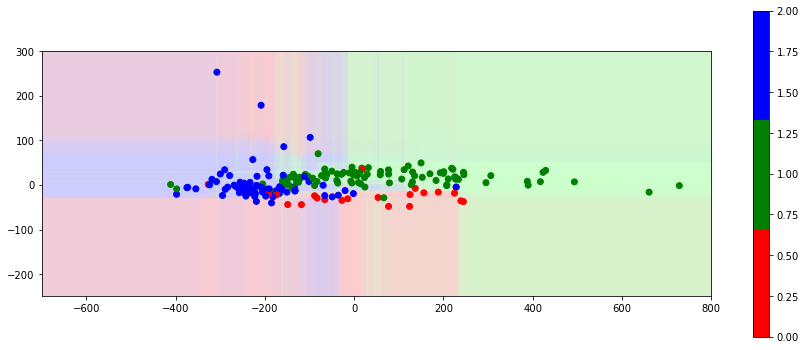

In [72]:
from matplotlib.colors import ListedColormap

fig, ax = plt.subplots(figsize=(15,6))

# Plot the decision surface as RGB.
img = ax.imshow(Z, alpha=0., extent=extent, origin='lower')

# Plot the points.
cmap = ListedColormap(['red', 'green', 'blue'])
scat = ax.scatter(*X_val_2.T, c=le.transform(y_val), cmap=cmap)
plt.colorbar(scat)
plt.show()

# Parameter selection

Many of the models can be improved (or worsened) by changing the parameters that internally make the method work. It's always a good idea to check the documentation of each model (e.g. `RandomForestClassifier` [docs](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)). This process is usually called _hyperparameter tuning_.

Scikit-learn offers a simple way to test different parameters for each model through a function called `GridSearchCV`

The grid search does cross-validation, instead of a validation set. So let's add our training and validation data together, so we get to use all of it.

In [73]:
X_all = np.vstack([X_train, X_val])
y_all = np.hstack([y_train, y_val])

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'min_samples_leaf':np.arange(1, 26, 1),
              'max_depth':np.arange(1, 16)}

rfc = RandomForestClassifier()
clf = GridSearchCV(rfc, parameters, iid=False, cv=6, n_jobs=4, verbose=1)
clf.fit(X_all, y_all)

How does the parameter space look like with respect to the score of the classifier?

In [ ]:
scores = clf.cv_results_['mean_test_score']
max_depths = clf.cv_results_["param_max_depth"].data.astype(int)
min_samples_leaf = clf.cv_results_["param_min_samples_leaf"].data.astype(int)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
im = ax.imshow(scores.reshape((15, 25)),
               origin='lower',
               extent=[0.5, 25.5, 0.5, 15.5],
               interpolation='none'
              )
ax.set_ylabel('max_depth')
ax.set_xlabel('min_samples_leaf')
cb = plt.colorbar(im, shrink=0.75)

`clf` can now tell us the best parameters to use with our `RandomForestClassifier`

In [ ]:
clf.best_params_

In [ ]:
clf.best_estimator_

The nice thing about `scikit-learn`'s methods is that they're all consistent and behave in the same way. Notice how`GridSearchCV` was `.fit()`. That means that we can use it to `.predict()` and it will automatically use the best set of parameters!

In [ ]:
y_pred = clf.predict(X_val)
print(classification_report(y_val, y_pred, digits=3))

Now might be a good time to check our **test** set — the one we reserved at the start. How might our model do on this dataset?

In [ ]:
y_check = clf.predict(X_test)
print(classification_report(y_test, y_check, digits=3))

We get similar performance as on the validation set! This is a good result, and gives us comfort that our model is going to do a reasonable job.

## Confusion matrix

It's also helpful to summarize the prediction tests using a [Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix). Scikit-learn has a function for that!

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_val, y_pred)

But as you can see, it's not very clear... What does each row/column represent? We can help a bit:

In [ ]:
from collections import Counter

Counter(y_val)

In [ ]:
selected = np.unique(y_val)

In [ ]:
# itertoools is a standard library for all kinds of handy iterator manipulation
import itertools

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_val, y_pred)

title = 'Confusion matrix'
cmap = plt.cm.Reds

# Plot non-normalized confusion matrix.
plt.imshow(cnf_matrix, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(selected))
plt.xticks(tick_marks, selected, rotation=45)
plt.yticks(tick_marks, selected)

# Print the support numbers inside the plot.
thresh = cnf_matrix.max() / 2.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, format(cnf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

## k-fold cross-validation

We should drop out entire wells, not just a bunch of random samples. Otherwise we're training on data that's just one sample away from data we're validating against.

To do this, we need a vector that contains an integer (or something) representing each unique well.

In [ ]:
wells = df['Well Name']

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.model_selection import LeaveOneGroupOut

logo = LeaveOneGroupOut()
clf = ExtraTreesClassifier(n_estimators=100, random_state=42)

for train, val in logo.split(X, y, groups=wells):
    # train and test are the indices of the data to use.
    well_name = wells[val[0]]
    clf.fit(X[train], y[train])
    score = clf.score(X[val], y[val])
    print("{:>20s}  {:.3f}".format(well_name, score))

## Model persistence

Often, we'd like to save the trained model, to go and apply it in some other application, or to share with someone else. The easiest way to save most models is as a Python 'pickle' object:

In [ ]:
from sklearn.externals import joblib
joblib.dump(clf, 'facies_model.pkl')

How do you load a saved model?

In [ ]:
clf = joblib.load('facies_model.pkl')

---
# Where to go next?

- More data!
- [XGBoost](https://xgboost.readthedocs.io/en/latest/)
- [LightGBM](https://github.com/Microsoft/LightGBM)
- If you want to get started on Neural Networks, [Keras](https://keras.io/) provides a scikit-learn type of experience

### Paper with classifier comparison ([link](https://arxiv.org/abs/1708.05070))

<img src="../data/model_performance.jpg"></img>

## The Data Science Hierarchy of Needs ([article](https://hackernoon.com/the-ai-hierarchy-of-needs-18f111fcc007))

<img src="../images/the_ai_hierarchy_of_needs.png"></img>

## Nuance

- Data normalization doesn't magically fix problems with data scaling. If you're lumping a bunch of well data together and the GR, say, has different ranges in each well, then the scaled data will also have this problem. So you still need to calibrate or normalize your data to ensure it's internally consistent. This is your reponsibility; `scikit-learn` scalers don't do this for you.

- Class imbalance is also your problem. You need to make sure you have good representation from all classes.


## Combining facies

Instead of eliminating facies from our analysis, we could do something like this:

    synonym_dict = {
        'mudstone': ['wackestone', 'mudstone'],
        'siltstone': ['f_siltstone'],
        'sandstone': ['sandstone'],
        'packstone': ['packstone'],
        'bafflestone': ['bafflestone'],
    }

    for name, synonyms in synonym_dict.items():
        for synonym in synonyms:
            df.loc[df.Facies==synonym, "Lumped"] = name

    df = df.dropna()


<hr />

<p style="color:gray">©2017 Agile Geoscience. Licensed CC-BY.</p>